# 주제선정: ABC 다국적 은행의 가입고객 이탈예측

In [231]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.font_manager as fm
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# font_path = '/Library/Fonts/Arial Unicode.ttf'      # mac 폰트 추가
font_path = 'C:\\Windows\\Fonts\\malgun.TTF'          # 한글 폰트를 적용하여 시각화
font = fm.FontProperties(fname=font_path).get_name()
matplotlib.rc('font', family=font)

# warnings 무시하기
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('./data/Bank Customer Churn Prediction.csv')
df

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


1. customer_id (고객 ID):

- 역할: 각 고객을 고유하게 식별하는 ID입니다.
- 분석: 모델 학습에 직접 사용되지는 않지만, 고객별 분석이나 결과 확인 시 유용하게 사용됩니다. 중복된 ID는 없는지 확인해야 합니다.
- 이탈 예측 영향: 직접적인 영향은 없지만, 다른 정보와 결합하여 고객 세분화 등에 활용될 수 있습니다.

2. credit_score (신용 점수):

- 역할: 고객의 신용도를 나타내는 점수입니다.
- 분석: 신용 점수가 낮을수록 대출 상환 능력이 낮아 이탈할 가능성이 높을 수 있습니다.
- 이탈 예측 영향: 중요한 예측 변수 중 하나입니다. 일반적으로 신용 점수가 낮을수록 이탈률이 높아지는 경향이 있습니다.

3. country (국가):

- 역할: 고객의 거주 국가입니다.
- 분석: 국가별 경제 상황, 문화적 요인, 은행 서비스 이용 패턴 등이 이탈에 영향을 미칠 수 있습니다.
- 이탈 예측 영향: 국가별 이탈률 차이를 분석하여 특정 국가 고객에게 맞춤형 전략을 수립할 수 있습니다.

4. gender (성별):

- 역할: 고객의 성별입니다.
- 분석: 성별에 따른 금융 상품 선호도, 은행 이용 패턴 등이 다를 수 있습니다.
- 이탈 예측 영향: 성별별 이탈률 차이를 분석하여 특정 성별 고객에게 맞는 마케팅 전략을 수립할 수 있습니다.

5. age (나이):

- 역할: 고객의 나이입니다.
- 분석: 연령대별 금융 상품 이용 패턴, 라이프스타일 등이 다르기 때문에 이탈에 영향을 미칠 수 있습니다.
- 이탈 예측 영향: 특정 연령대에서 이탈률이 높다면 해당 연령대를 위한 맞춤형 서비스를 제공할 수 있습니다.

6. tenure (가입 기간):

- 역할: 고객이 은행에 가입한 기간 (년)입니다.
- 분석: 일반적으로 가입 기간이 짧은 고객이 이탈할 가능성이 높습니다. 장기 고객은 은행 서비스에 익숙하고 혜택을 누리고 있을 가능성이 높기 때문입니다.
- 이탈 예측 영향: 중요한 예측 변수 중 하나입니다.

7. balance (잔액):

- 역할: 고객의 계좌 잔액입니다.
- 분석: 잔액이 적거나 없을 경우 은행 서비스 이용 필요성이 줄어들어 이탈 가능성이 높아질 수 있습니다.
- 이탈 예측 영향: 중요한 예측 변수 중 하나입니다.

8. products_number (상품 수):

- 역할: 고객이 이용하는 은행 상품의 개수입니다.
- 분석: 이용하는 상품 수가 많을수록 은행과의 관계가 깊어 이탈 가능성이 낮아질 수 있습니다.
- 이탈 예측 영향: 중요한 예측 변수 중 하나입니다.

9. credit_card (신용카드 보유 여부):

- 역할: 고객의 신용카드 보유 여부 (Yes/No 또는 1/0)입니다.
- 분석: 신용카드 보유 고객은 은행 서비스 이용률이 높고, 다양한 금융 상품을 이용할 가능성이 높아 이탈률이 낮을 수 있습니다.
- 이탈 예측 영향: 이탈 예측에 영향을 미칠 수 있는 변수입니다.

10. active_member (활동 고객 여부):

- 역할: 고객의 활동 여부 (Yes/No 또는 1/0)입니다.
- 분석: 활동 고객은 은행 서비스를 꾸준히 이용하고 있으므로 이탈 가능성이 낮습니다.
- 이탈 예측 영향: 매우 중요한 예측 변수입니다.

11. estimated_salary (추정 연봉):

- 역할: 고객의 추정 연봉입니다.
- 분석: 연봉이 높을수록 은행의 VIP 고객일 가능성이 높아 이탈률이 낮을 수 있습니다.
- 이탈 예측 영향: 이탈 예측에 영향을 미칠 수 있는 변수입니다.

12. churn (이탈 여부):

- 역할: 고객의 이탈 여부 (Yes/No 또는 1/0)입니다. Target 변수입니다.
- 분석: 모델 학습을 통해 이탈 가능성이 높은 고객을 예측하는 것이 목표입니다.
- 이탈 예측 영향: 모델의 성능을 평가하는 기준이 됩니다.

---

### 기본 전처리 및 시각화

In [232]:
# 결측치 없음 확인
df.isna().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [233]:
# 컬럼별 데이터 타입 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


---

##### dtype: 숫자형 확인하기

In [234]:
numb_df = df.select_dtypes(exclude=['object'])
numb_df

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,42,3,75075.31,2,1,0,92888.52,1


---

##### dtype: 문자형 확인하기 -> 숫자형 변환하기 (범주형 데이터 처리 완료)

In [235]:
char_df = df.select_dtypes(include=['object']).apply(pd.unique)
char_df

country    [France, Spain, Germany]
gender               [Female, Male]
dtype: object

- country 는 3개, gender 는 2개의 유니크 값을 가지고 있다. 따라서 라벨 인코딩보다 원-핫 인코딩이 적합

In [236]:
df['country'] = df['country'].map({'France': 0, 'Germany':1, 'Spain': 2})
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,0,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,2,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,0,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,0,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,2,Female,43,2,125510.82,1,1,1,79084.10,0


In [237]:
df['gender'] = df['gender'].map({'Male': 0, 'Female' : 1})
df.head(10)

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,0,1,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,2,1,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,0,1,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,0,1,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,2,1,43,2,125510.82,1,1,1,79084.10,0
5,15574012,645,2,0,44,8,113755.78,2,1,0,149756.71,1
6,15592531,822,0,0,50,7,0.00,2,1,1,10062.80,0
7,15656148,376,1,1,29,4,115046.74,4,1,0,119346.88,1
8,15792365,501,0,0,44,4,142051.07,2,0,1,74940.50,0
9,15592389,684,0,0,27,2,134603.88,1,1,1,71725.73,0


---

##### dtype: 문자형 (시각화)

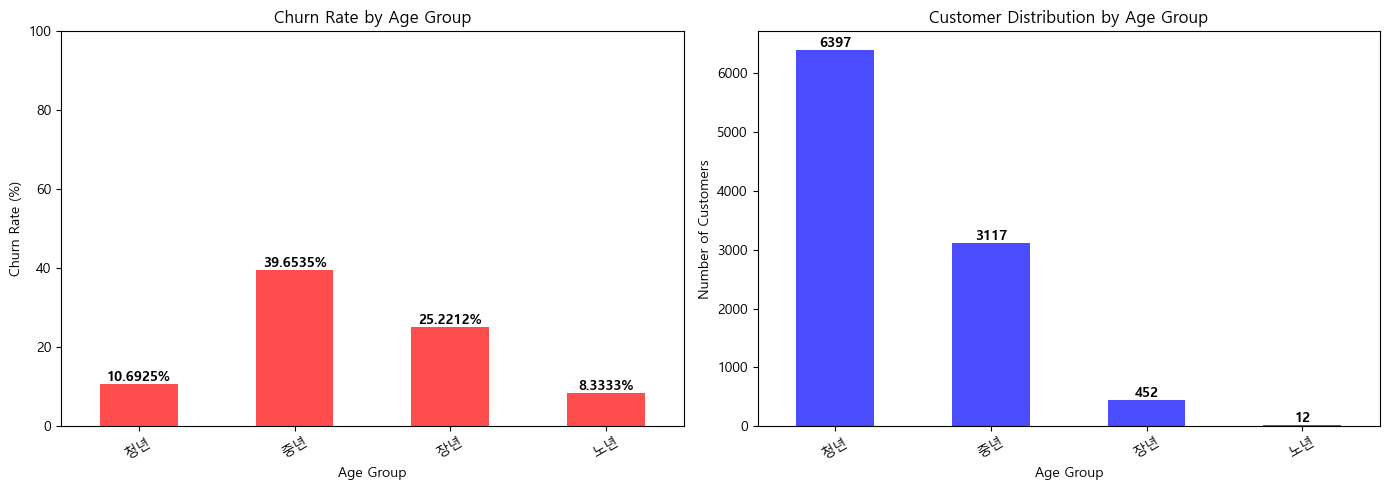

In [238]:
# age를 연령대 그룹화
df["age_group"] = pd.cut(df["age"], bins=[18, 40, 60, 80, 100], labels=["청년", "중년", "장년", '노년'])

# 연령대 순서 지정
age_order = ["청년", "중년", "장년", "노년"]

# 연령대별 이탈률(%) 계산
churn_data_age = df.groupby('age_group')['churn'].mean() * 100

# 지정된 순서대로 정렬
churn_data_age = churn_data_age.reindex(age_order)

# 연령대별 고객 수(빈도) 계산
age_group_counts = df['age_group'].value_counts().reindex(age_order)

# 그래프 시각화
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 첫 번째 그래프: 연령대별 이탈률(%)
ax1 = axes[0]
churn_data_age.plot(kind='bar', color='red', alpha=0.7, ax=ax1)
ax1.set_title("Churn Rate by Age Group")
ax1.set_xlabel("Age Group")
ax1.set_ylabel("Churn Rate (%)")
ax1.set_xticklabels(age_order, rotation=30)
ax1.set_ylim(0, 100)

# 막대 위에 수치 표시
for p in ax1.patches:
    ax1.annotate(f'{p.get_height():.4f}%', 
                 (p.get_x() + p.get_width() / 2, p.get_height()), 
                 ha='center', va='bottom', fontsize=10, fontweight='bold')

# 두 번째 그래프: 연령대별 고객 수
ax2 = axes[1]
age_group_counts.plot(kind='bar', color='blue', alpha=0.7, ax=ax2)
ax2.set_title("Customer Distribution by Age Group")
ax2.set_xlabel("Age Group")
ax2.set_ylabel("Number of Customers")
ax2.set_xticklabels(age_order, rotation=30)

# 막대 위에 수치 표시
for p in ax2.patches:
    ax2.annotate(f'{int(p.get_height())}', 
                 (p.get_x() + p.get_width() / 2, p.get_height()), 
                 ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

# 연령대 그룹화 해제
df.drop('age_group', axis=1, inplace=True)

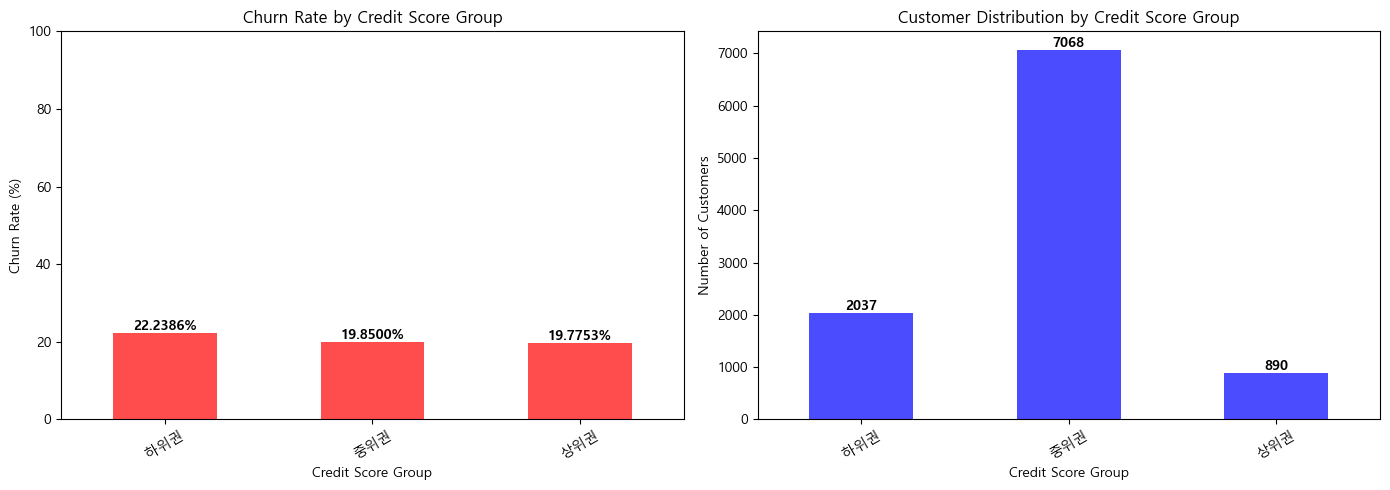

In [239]:
# credit_score를 신용 등급으로 변환
df["credit_score_group"] = pd.cut(df["credit_score"], bins=[350, 567, 784, 1000], labels=["하위권", '중위권', '상위권'])

# 신용 점수 그룹 순서 지정
credit_order = ["하위권", '중위권', '상위권']

# 신용 점수 그룹별 이탈률(%) 계산
churn_data_credit = df.groupby('credit_score_group')['churn'].mean() * 100
churn_data_credit = churn_data_credit.reindex(credit_order)

# 신용 점수 그룹별 고객 수(빈도) 계산
credit_group_counts = df['credit_score_group'].value_counts().reindex(credit_order)

# 그래프 시각화
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 첫 번째 그래프: 신용 점수 그룹별 이탈률(%)
ax1 = axes[0]
churn_data_credit.plot(kind='bar', color='red', alpha=0.7, ax=ax1)
ax1.set_title("Churn Rate by Credit Score Group")
ax1.set_xlabel("Credit Score Group")
ax1.set_ylabel("Churn Rate (%)")
ax1.set_xticklabels(credit_order, rotation=30)
ax1.set_ylim(0, 100)

# 막대 위에 수치 표시
for p in ax1.patches:
    ax1.annotate(f'{p.get_height():.4f}%', 
                 (p.get_x() + p.get_width() / 2, p.get_height()), 
                 ha='center', va='bottom', fontsize=10, fontweight='bold')

# 두 번째 그래프: 신용 점수 그룹별 고객 수
ax2 = axes[1]
credit_group_counts.plot(kind='bar', color='blue', alpha=0.7, ax=ax2)
ax2.set_title("Customer Distribution by Credit Score Group")
ax2.set_xlabel("Credit Score Group")
ax2.set_ylabel("Number of Customers")
ax2.set_xticklabels(credit_order, rotation=30)

# 막대 위에 수치 표시
for p in ax2.patches:
    ax2.annotate(f'{int(p.get_height())}', 
                 (p.get_x() + p.get_width() / 2, p.get_height()), 
                 ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

# 신용 등급 그룹화 해제
df.drop('credit_score_group', axis=1, inplace=True)

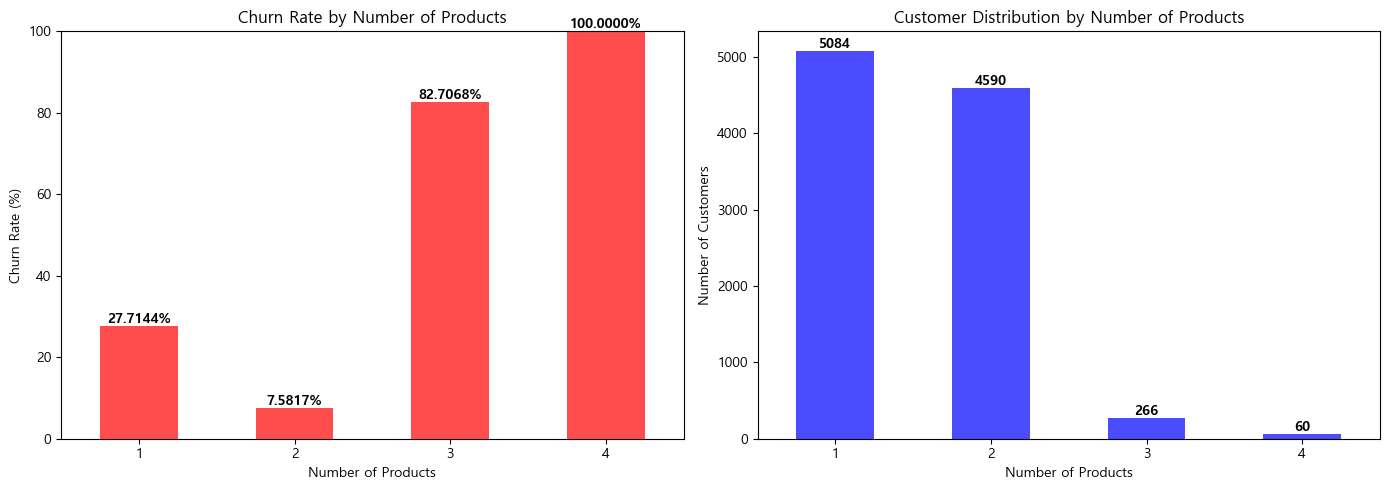

In [240]:
# 상품 개수별 이탈률(%) 계산
churn_data_product = df.groupby('products_number')['churn'].mean() * 100

# 상품 개수별 고객 수(빈도) 계산
product_group_counts = df['products_number'].value_counts().sort_index()

# 그래프 시각화
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 첫 번째 그래프: 상품 개수별 이탈률(%)
ax1 = axes[0]
churn_data_product.plot(kind='bar', color='red', alpha=0.7, ax=ax1)
ax1.set_title("Churn Rate by Number of Products")
ax1.set_xlabel("Number of Products")
ax1.set_ylabel("Churn Rate (%)")
ax1.set_xticklabels(churn_data_product.index, rotation=0)
ax1.set_ylim(0, 100)

# 막대 위에 수치 표시
for p in ax1.patches:
    ax1.annotate(f'{p.get_height():.4f}%', 
                 (p.get_x() + p.get_width() / 2, p.get_height()), 
                 ha='center', va='bottom', fontsize=10, fontweight='bold')

# 두 번째 그래프: 상품 개수별 고객 수
ax2 = axes[1]
product_group_counts.plot(kind='bar', color='blue', alpha=0.7, ax=ax2)
ax2.set_title("Customer Distribution by Number of Products")
ax2.set_xlabel("Number of Products")
ax2.set_ylabel("Number of Customers")
ax2.set_xticklabels(product_group_counts.index, rotation=0)

# 막대 위에 수치 표시
for p in ax2.patches:
    ax2.annotate(f'{int(p.get_height())}', 
                 (p.get_x() + p.get_width() / 2, p.get_height()), 
                 ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

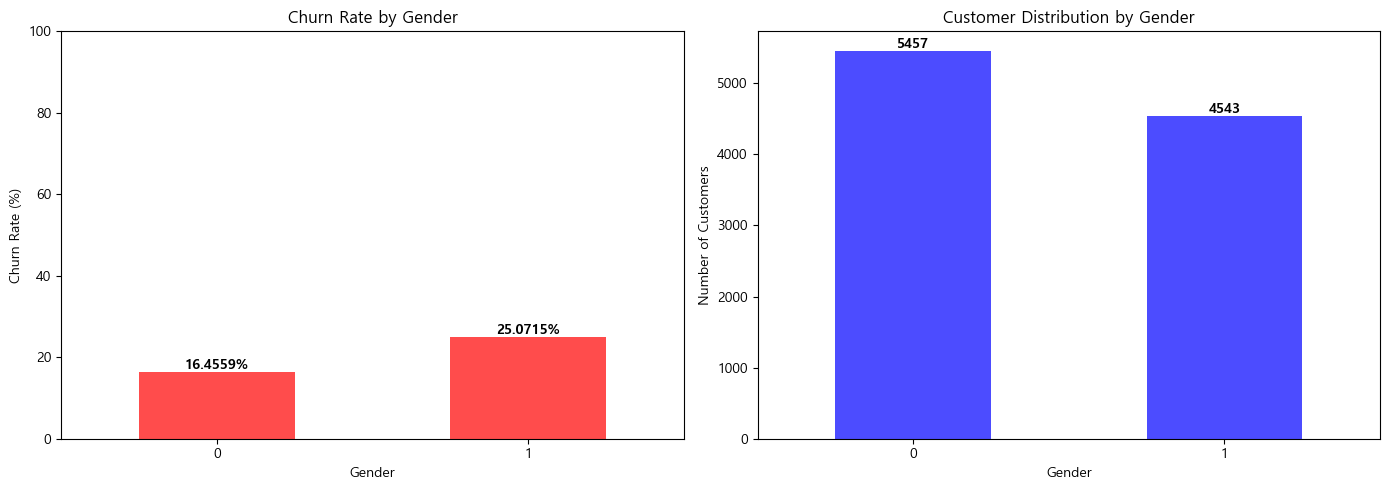

In [241]:
# 성별 이탈률(%) 계산
churn_data_gender = df.groupby('gender')['churn'].mean() * 100

# 성별 고객 수(빈도) 계산
gender_group_counts = df['gender'].value_counts()

# 그래프 시각화
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 첫 번째 그래프: 성별 이탈률(%)
ax1 = axes[0]
churn_data_gender.plot(kind='bar', color='red', alpha=0.7, ax=ax1)
ax1.set_title("Churn Rate by Gender")
ax1.set_xlabel("Gender")
ax1.set_ylabel("Churn Rate (%)")
ax1.set_xticklabels(churn_data_gender.index, rotation=0)
ax1.set_ylim(0, 100)

# 막대 위에 수치 표시
for p in ax1.patches:
    ax1.annotate(f'{p.get_height():.4f}%', 
                 (p.get_x() + p.get_width() / 2, p.get_height()), 
                 ha='center', va='bottom', fontsize=10, fontweight='bold')

# 두 번째 그래프: 성별 고객 수
ax2 = axes[1]
gender_group_counts.plot(kind='bar', color='blue', alpha=0.7, ax=ax2)
ax2.set_title("Customer Distribution by Gender")
ax2.set_xlabel("Gender")
ax2.set_ylabel("Number of Customers")
ax2.set_xticklabels(gender_group_counts.index, rotation=0)

# 막대 위에 수치 표시
for p in ax2.patches:
    ax2.annotate(f'{int(p.get_height())}', 
                 (p.get_x() + p.get_width() / 2, p.get_height()), 
                 ha='center', va='bottom', fontsize=10, fontweight='bold')
    
# Adjust layout and display plot
plt.tight_layout()
plt.show()

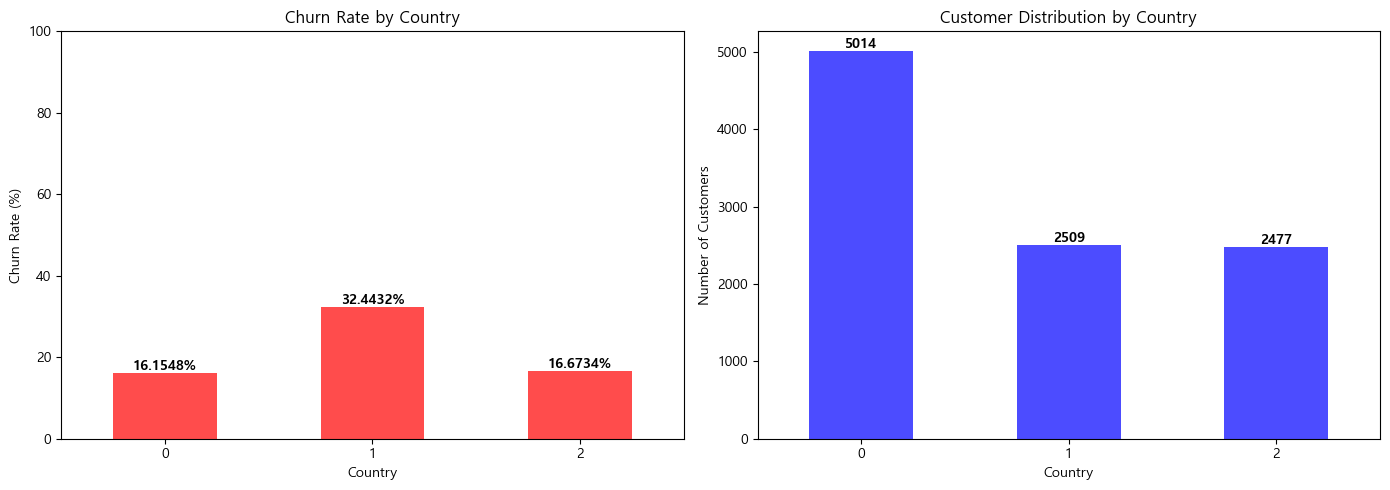

In [242]:
# 국가별 이탈률(%) 계산
churn_data_country = df.groupby('country')['churn'].mean() * 100

# 국가별 고객 수(빈도) 계산
country_group_counts = df['country'].value_counts()

# 그래프 시각화
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 첫 번째 그래프: 국가별 이탈률(%)
ax1 = axes[0]
churn_data_country.plot(kind='bar', color='red', alpha=0.7, ax=ax1)
ax1.set_title("Churn Rate by Country")
ax1.set_xlabel("Country")
ax1.set_ylabel("Churn Rate (%)")
ax1.set_xticklabels(churn_data_country.index, rotation=0)
ax1.set_ylim(0, 100)

# 막대 위에 수치 표시
for p in ax1.patches:
    ax1.annotate(f'{p.get_height():.4f}%', 
                 (p.get_x() + p.get_width() / 2, p.get_height()), 
                 ha='center', va='bottom', fontsize=10, fontweight='bold')

# 두 번째 그래프: 국가별 고객 수
ax2 = axes[1]
country_group_counts.plot(kind='bar', color='blue', alpha=0.7, ax=ax2)
ax2.set_title("Customer Distribution by Country")
ax2.set_xlabel("Country")
ax2.set_ylabel("Number of Customers")
ax2.set_xticklabels(country_group_counts.index, rotation=0)

# 막대 위에 수치 표시
for p in ax2.patches:
    ax2.annotate(f'{int(p.get_height())}', 
                 (p.get_x() + p.get_width() / 2, p.get_height()), 
                 ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()


---

##### dtype: 숫자형 (시각화)

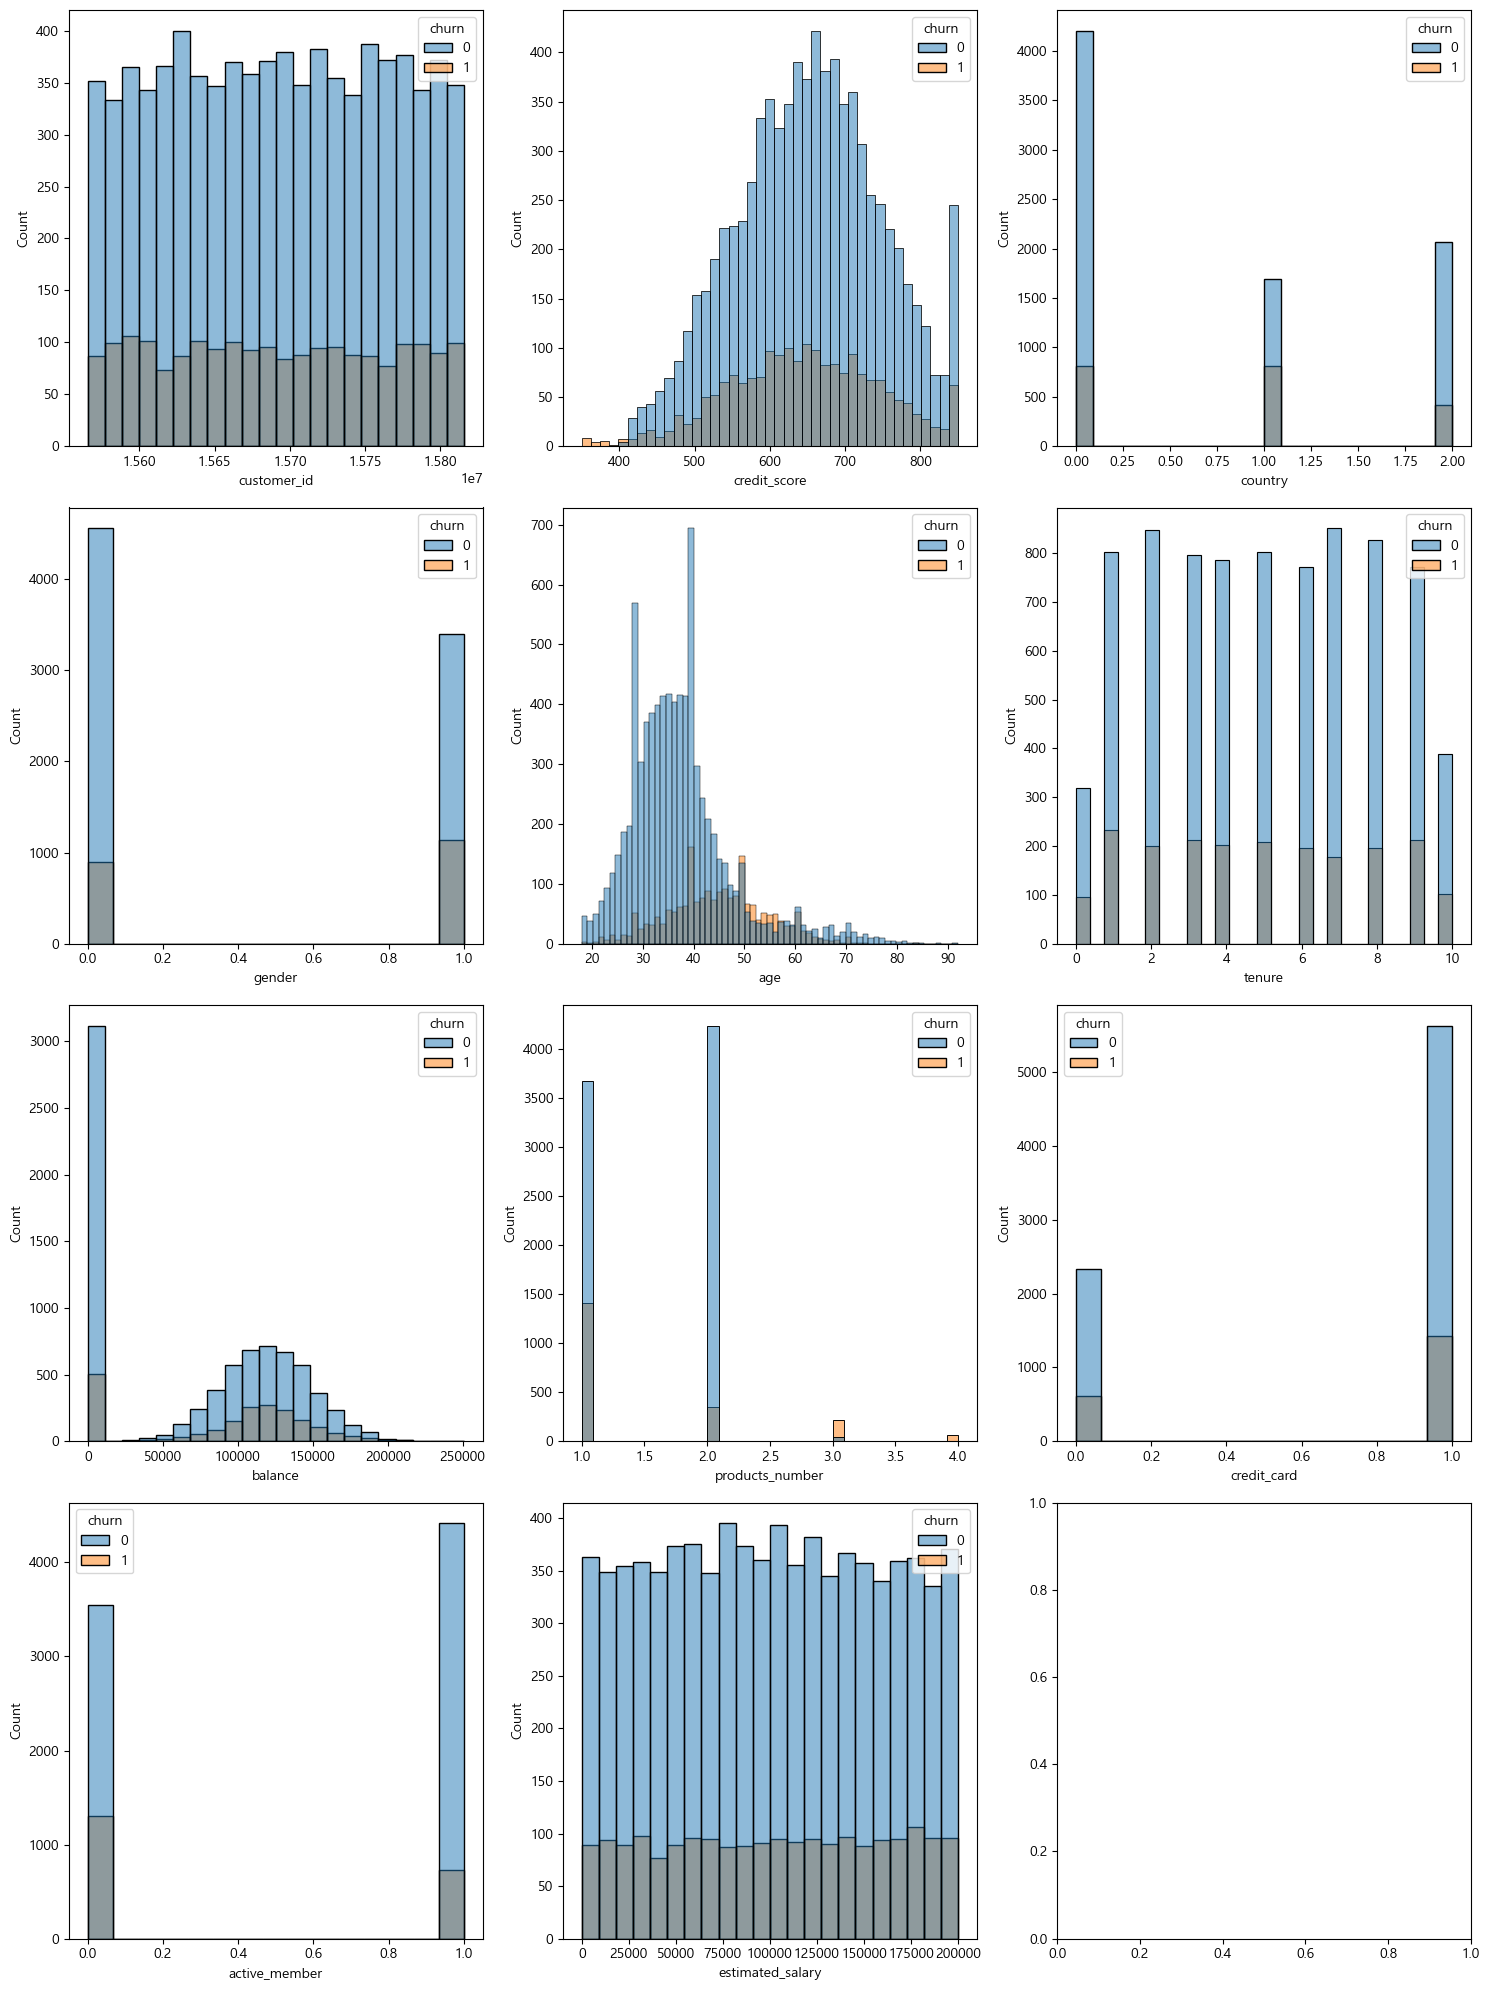

In [243]:
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(15,20))
axs = axs.flat

num_plots = 11                                          # subplot의 총 개수

for i in range(min(num_plots, len(df.columns) - 1)):    # 둘 중 작은 값까지 반복
    sns.histplot(data=df, x=df.columns[i], hue="churn", ax=axs[i])

plt.tight_layout()
plt.show()

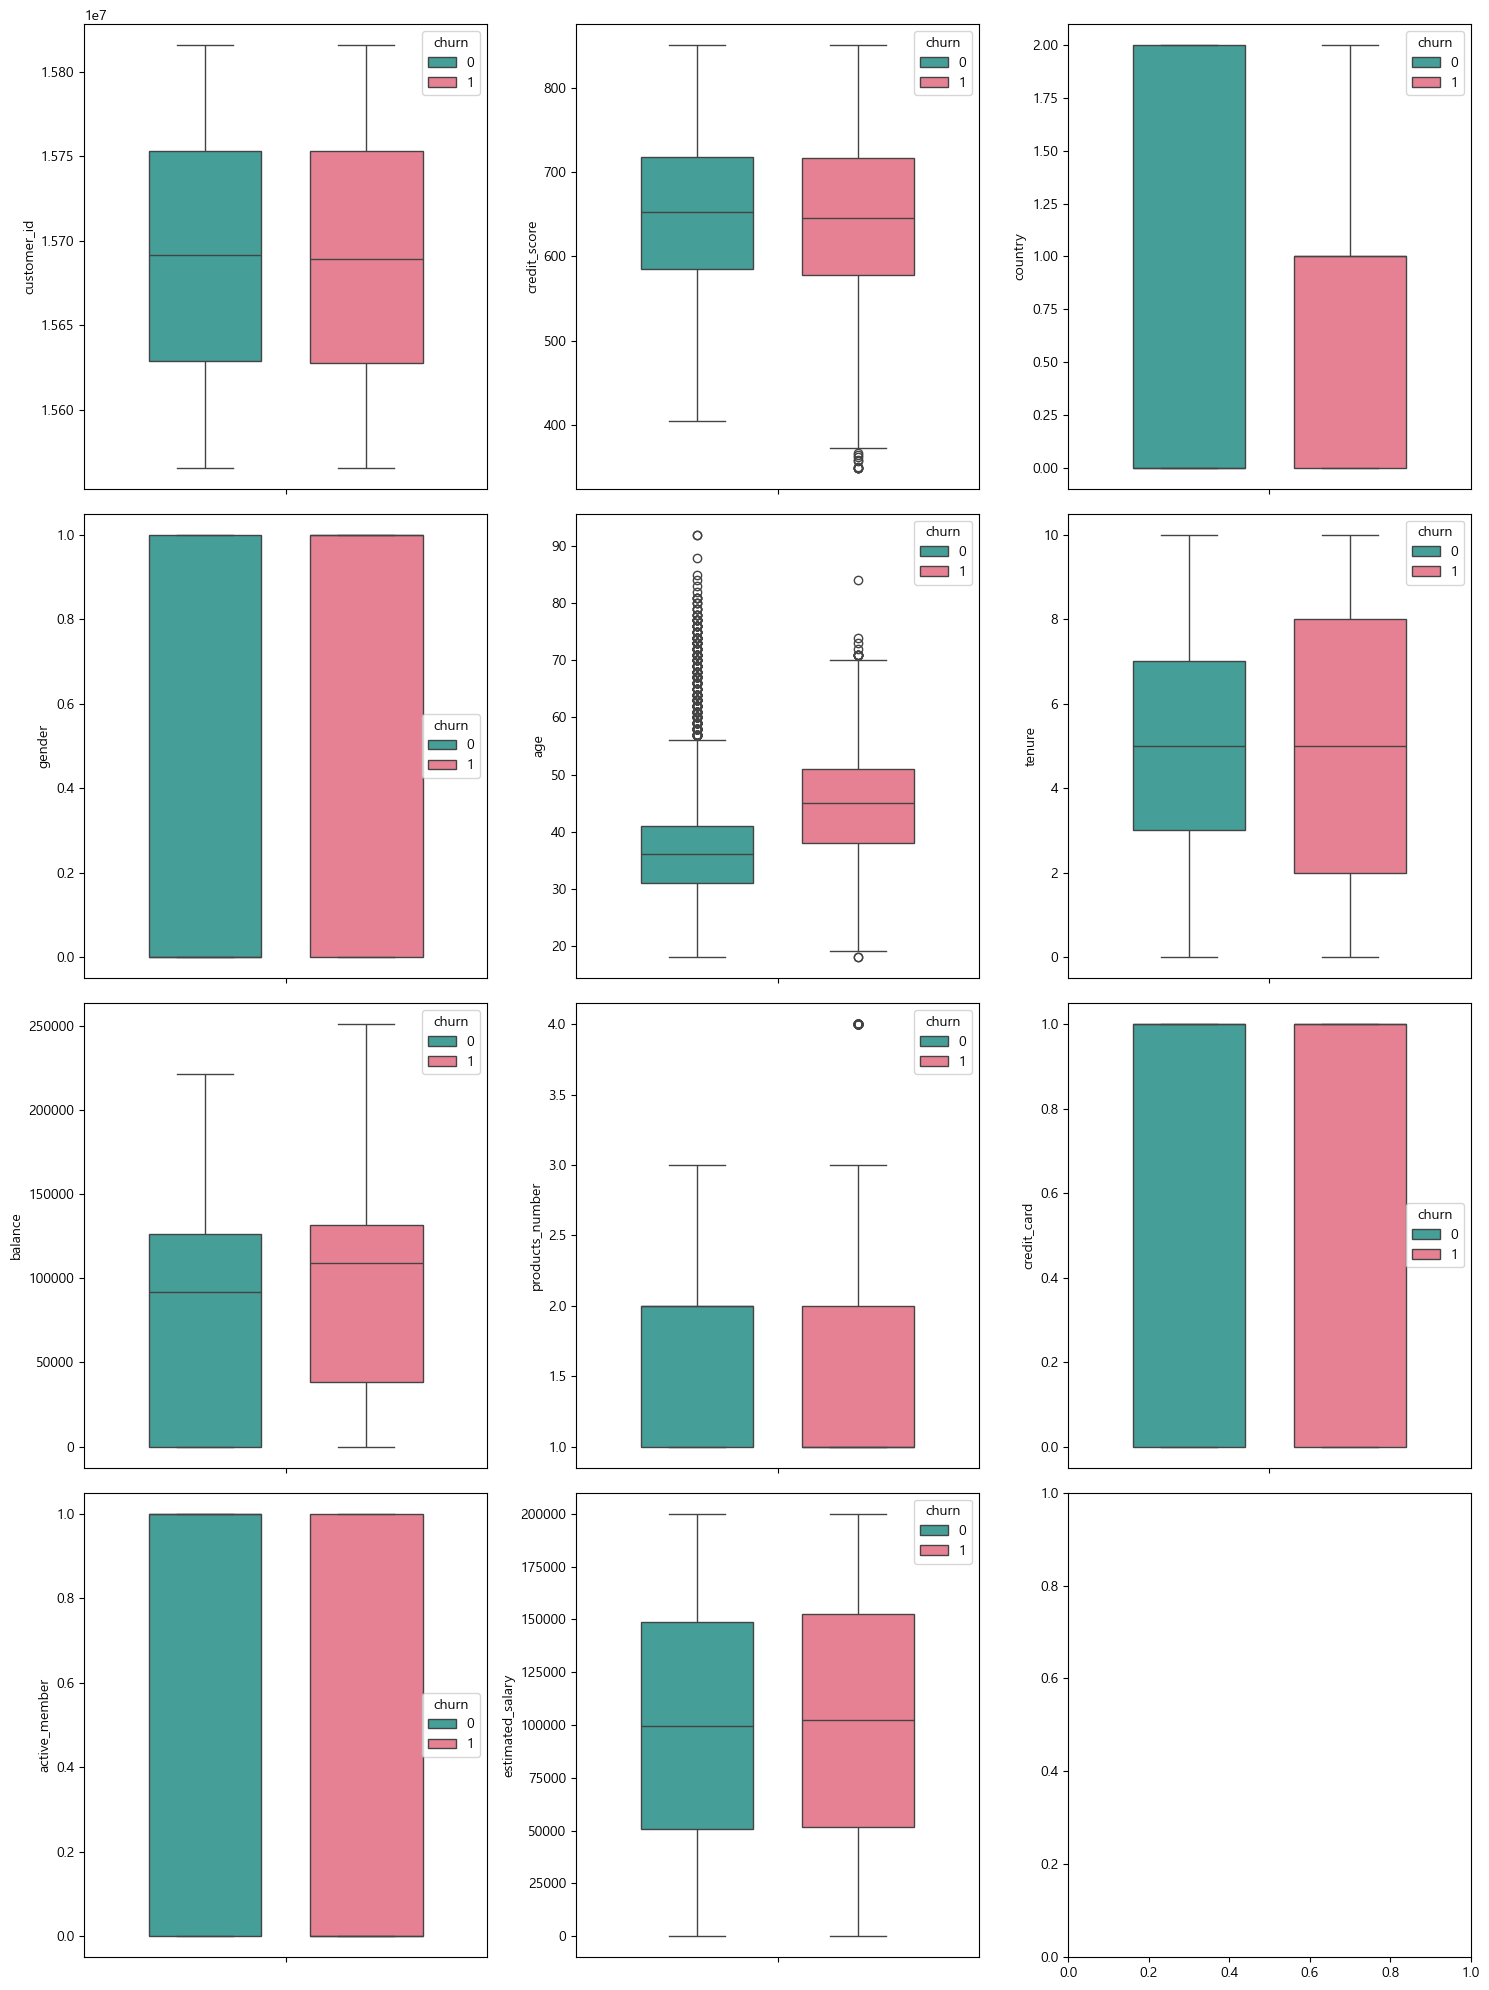

In [244]:
# husl 팔레트 설정
palette = sns.color_palette("husl")

# 4번째 색상과 1번째 색상만 사용
selected_palette = [palette[3], palette[0]]

# 서브플롯 생성
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(15, 20))
axs = axs.flat

num_plots = 11  

# 각 열에 대해 박스 그래프 생성
for i in range(min(num_plots, len(df.columns) - 1)):
    sns.boxplot(data=df, 
                y=df.columns[i], 
                hue="churn", 
                ax=axs[i], 
                palette=selected_palette, 
                gap = 0.3)  # hue에 따라 색상 지정

plt.tight_layout()
plt.show()


---

### 심화 전처리 및 시각화

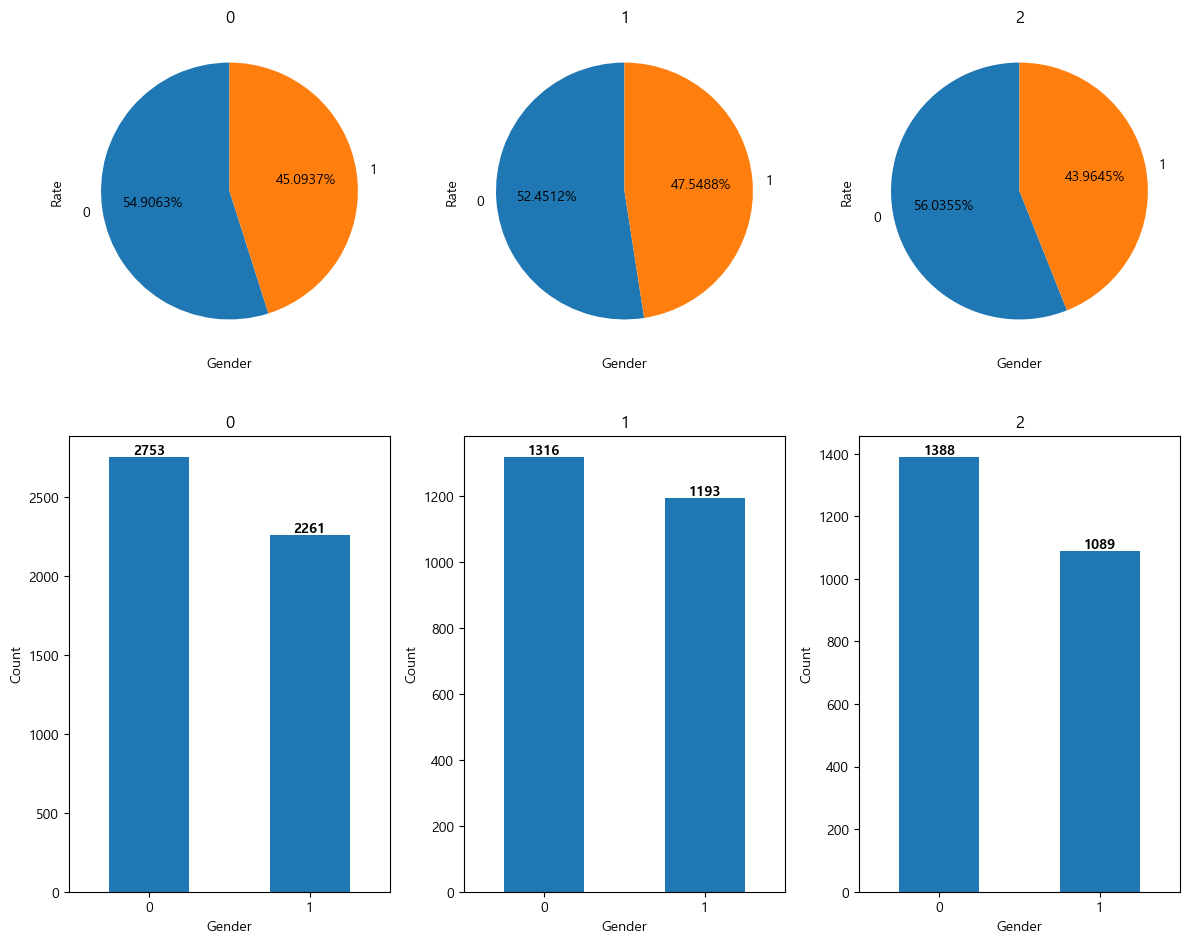

In [245]:
# 국가별 성별분포 확인
country_gender_df = df.groupby('country')['gender'].value_counts().unstack()

# Create subplots (2 rows, 3 columns)
fig, axes = plt.subplots(2, 3, figsize=(12, 10))  # Adjust figure size as needed

# Plot pie plots in the first row (index 0)
for i, country in enumerate(country_gender_df.index):
    gender_counts = country_gender_df.loc[country]
    proportions = gender_counts / gender_counts.sum()

    axes[0, i].pie(proportions, labels=proportions.index, autopct='%1.4f%%', startangle=90)  # autopct for percentage display
    axes[0, i].set_title(country)
    axes[0, i].set_xlabel('Gender')
    axes[0, i].set_ylabel('Rate')


# Plot bar plots in the second row (index 1)
for i, country in enumerate(country_gender_df.index):
    ax = axes[1, i]  # Get the current subplot

    country_gender_df.loc[country].plot(kind='bar', ax=ax)
    ax.set_title(country)
    ax.set_xlabel('Gender')
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=0)  # Improved x-axis label readability

    # Add count labels on top of bars
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}',  # Format as integer count
                     (p.get_x() + p.get_width() / 2, p.get_height()),
                     ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

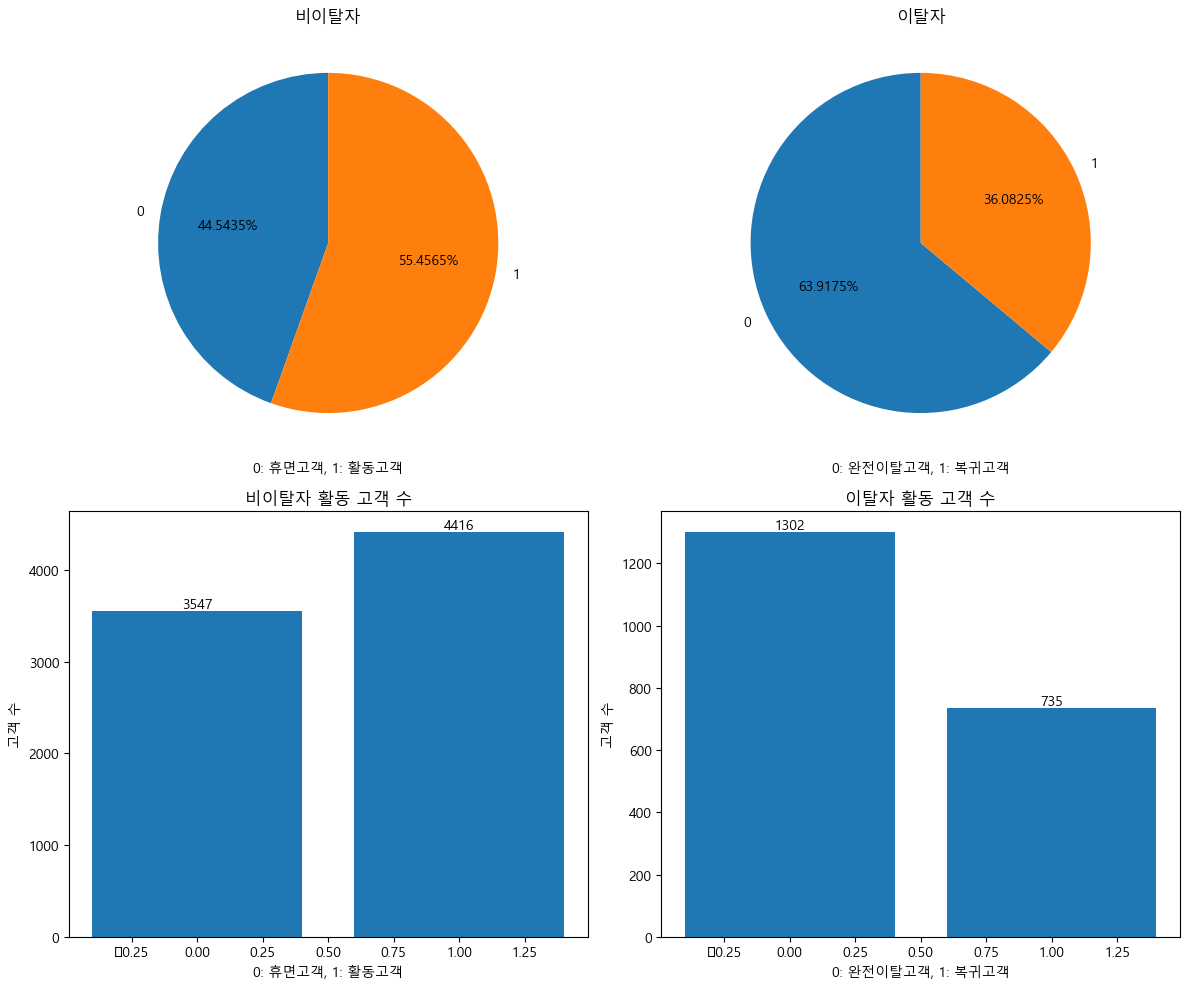

In [246]:
    # churn     active
# 0   비이탈     비활동
# 1    이탈       활동

# 비이탈_비활동 -> 휴면고객
# 비이탈_활동 -> 활동고객
# 이탈_비활동 -> 완전이탈고객
# 이탈_활동 -> 복귀고객

# 이탈자별 활동여부 확인
churn_active = df.groupby('churn')['active_member'].value_counts().unstack()

# 서브플롯 생성 (2행 2열)
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# churn = 0에 대한 파이 차트
churn_0_data = churn_active.loc[0]
proportions_0 = churn_0_data / churn_0_data.sum()

axes[0, 0].pie(proportions_0, labels=proportions_0.index, autopct='%1.4f%%', startangle=90)
axes[0, 0].set_title('비이탈자')
axes[0, 0].set_xlabel('0: 휴면고객, 1: 활동고객')

# churn = 1에 대한 파이 차트
churn_1_data = churn_active.loc[1]
proportions_1 = churn_1_data / churn_1_data.sum()

axes[0, 1].pie(proportions_1, labels=proportions_1.index, autopct='%1.4f%%', startangle=90)
axes[0, 1].set_title('이탈자')
axes[0, 1].set_xlabel('0: 완전이탈고객, 1: 복귀고객')


# churn = 0에 대한 막대 그래프
axes[1, 0].bar(churn_0_data.index, churn_0_data.values)
axes[1, 0].set_title('비이탈자 활동 고객 수')
axes[1, 0].set_xlabel('0: 휴면고객, 1: 활동고객')
axes[1, 0].set_ylabel('고객 수')
for i, v in enumerate(churn_0_data.values):
     axes[1, 0].text(i, v, str(v), ha='center', va='bottom')  # 막대 위에 숫자 표시

# churn = 1에 대한 막대 그래프
axes[1, 1].bar(churn_1_data.index, churn_1_data.values)
axes[1, 1].set_title('이탈자 활동 고객 수')
axes[1, 1].set_xlabel('0: 완전이탈고객, 1: 복귀고객')
axes[1, 1].set_ylabel('고객 수')
for i, v in enumerate(churn_1_data.values):
     axes[1, 1].text(i, v, str(v), ha='center', va='bottom') # 막대 위에 숫자 표시

plt.tight_layout()
plt.show()

age                 0.285323
balance             0.118533
gender              0.106512
country             0.035943
estimated_salary    0.012097
customer_id        -0.006248
credit_card        -0.007138
tenure             -0.014001
credit_score       -0.027094
products_number    -0.047820
active_member      -0.156128
Name: churn, dtype: float64


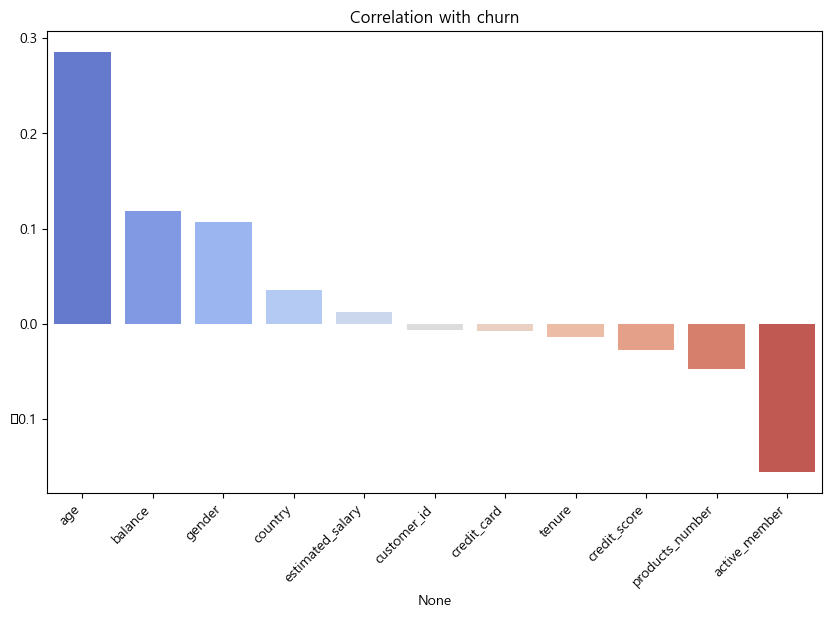

In [247]:
corr_matrix = df.corr()

churn_corr = corr_matrix['churn'].drop('churn')

churn_corr_sorted = churn_corr.sort_values(ascending=False)

print(churn_corr_sorted)

plt.figure(figsize=(10, 6))
sns.barplot(x=churn_corr_sorted.index, y=churn_corr_sorted.values, palette='coolwarm')
plt.title('Correlation with churn')
plt.xticks(rotation = 45, ha = 'right')
plt.show()

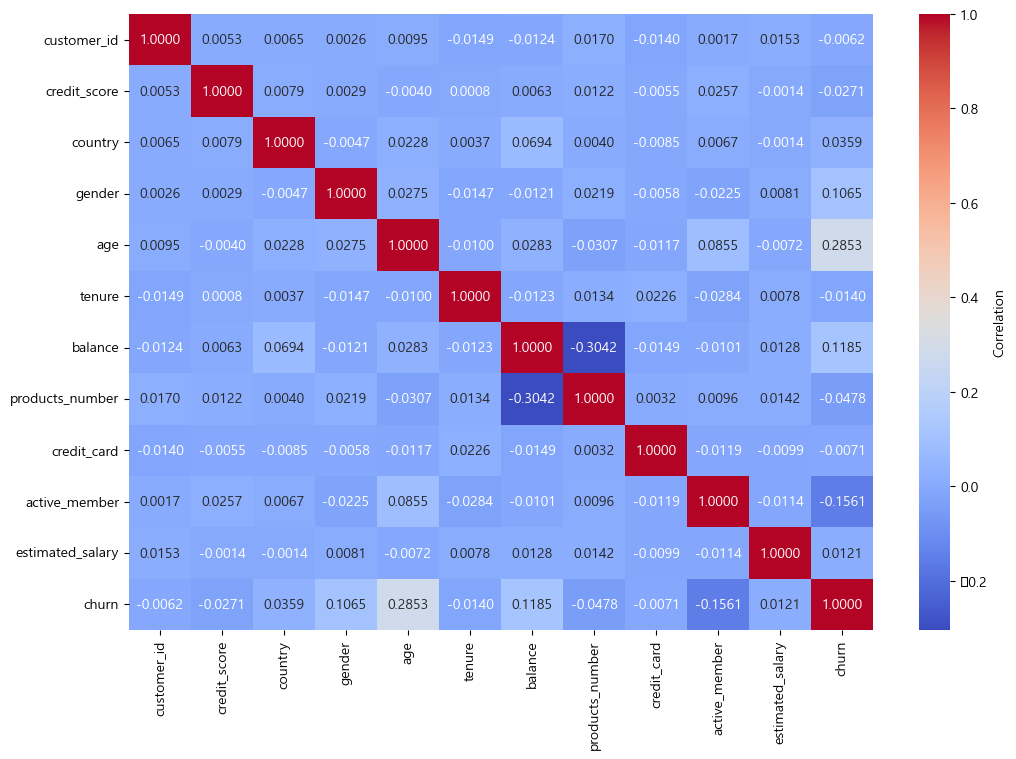

In [248]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt= '.4f', cbar_kws={'label': 'Correlation'} )
plt.show()

In [249]:
# 결측값 처리 (예시: 평균으로 채우기)
df_const = add_constant(df)  # 상수 추가
df_const = df_const.fillna(df_const.mean())  # 결측값 평균으로 채우기

# 숫자형 데이터만 선택
df_const = df_const.select_dtypes(include=[np.number])

# VIF 계산
vif_data = pd.DataFrame()
vif_data['Variable'] = df_const.columns
vif_data['VIF'] = [variance_inflation_factor(df_const.values, i) for i in range(df_const.shape[1])]

# VIF 결과 출력
print(vif_data[1:])

            Variable       VIF
1        customer_id  1.001249
2       credit_score  1.001650
3            country  1.006898
4             gender  1.012944
5                age  1.110635
6             tenure  1.002363
7            balance  1.122340
8    products_number  1.104872
9        credit_card  1.001366
10     active_member  1.046622
11  estimated_salary  1.001279
12             churn  1.158137


* 각 변수들 간의 상관관계는 낮은 것으로 나타났다.
* 추가적인 처리 불필요

##### 로그 변환 가능성 컬럼 확인

* balance, estimated_salary 는 단위가 크고 치우침이 있는 데이터라 로그 변환이 필요하다고 판단

In [250]:
# log_needed_df = df[['balance', 'estimated_salary']]

# 1. 왜도 계산 
skewness = df.skew()

# 2. 왜도가 1보다 큰 컬럼들 확인 
skewed_colums = skewness[skewness > 1].index
print("왜도가 1보다 큰 컬럼들:", skewed_colums)

왜도가 1보다 큰 컬럼들: Index(['age', 'churn'], dtype='object')


In [251]:
df.drop('customer_id', axis=1, inplace=True)
df

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,0,1,42,2,0.00,1,1,1,101348.88,1
1,608,2,1,41,1,83807.86,1,0,1,112542.58,0
2,502,0,1,42,8,159660.80,3,1,0,113931.57,1
3,699,0,1,39,1,0.00,2,0,0,93826.63,0
4,850,2,1,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,0,39,5,0.00,2,1,0,96270.64,0
9996,516,0,0,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,1,36,7,0.00,1,0,1,42085.58,1
9998,772,1,0,42,3,75075.31,2,1,0,92888.52,1


In [252]:
# 전처리가 끝난 새 데이터 프레임을 csv 파일 형태로 저장
df.to_csv("./data/Transformed_Bank_Customer_Churn_Prediction.csv", index=False)

In [253]:
# 새 csv 파일을 호출
df = pd.read_csv("./data/Transformed_Bank_Customer_Churn_Prediction.csv")
df

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,0,1,42,2,0.00,1,1,1,101348.88,1
1,608,2,1,41,1,83807.86,1,0,1,112542.58,0
2,502,0,1,42,8,159660.80,3,1,0,113931.57,1
3,699,0,1,39,1,0.00,2,0,0,93826.63,0
4,850,2,1,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,0,39,5,0.00,2,1,0,96270.64,0
9996,516,0,0,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,1,36,7,0.00,1,0,1,42085.58,1
9998,772,1,0,42,3,75075.31,2,1,0,92888.52,1


---

### 파라미터 'df' 데이터셋을 이용하여 이하 머신러닝 진행